**RNN**

In [ ]:
import numpy as np
from numpy.random import randn

class RNN:

    def __init__(self, in_features, hidden_size, n_classes, activation='tanh'):
        self.in_features = in_features
        self.hidden_size = hidden_size
        self.n_classes = n_classes
        self.activation = activation
        
        self.Waa = self.init_weight_matrix((hidden_size, hidden_size))
        self.Wax =  self.init_weight_matrix((hidden_size, in_features))
        self.Way =  self.init_weight_matrix((n_classes, hidden_size))
        self.ba = self.init_weight_matrix((hidden_size, 1)) 
        self.by = self.init_weight_matrix((n_classes, 1)) 
        
    def softmax(self, x):
        return(np.exp(x)/np.sum(np.exp(x), axis=1, keepdims=True))

    def init_weight_matrix(self, size):
        np.random.seed(1)
        W = np.random.uniform(size=size)
        return W

    def forward(self, inputs):
        a = np.zeros((self.Waa.shape[0], 1))
        inputs = inputs.T
        
        for i, x in enumerate(inputs):
       #     raise Exception("Wxh =", self.Wxh, "X =", x)
            a = np.tanh(self.Wax @ x + self.Waa @ a + self.ba)
            y = self.softmax(self.Way @ a + self.by)
        return y
    
def read_matrix(n_rows, dtype=float):
    return np.array([list(map(dtype, input().split())) for _ in range(n_rows)])

def print_matrix(matrix):
    for row in matrix:
        print(' '.join(map(str, row)))

def solution():
    in_features, hidden_size, n_classes = map(int, input().split())
    input_vectors = read_matrix(in_features)

    rnn = RNN(in_features, hidden_size, n_classes)
    output = rnn.forward(input_vectors) #.round(3)
    print_matrix(output)

solution()

**Реализация forward для СNN**

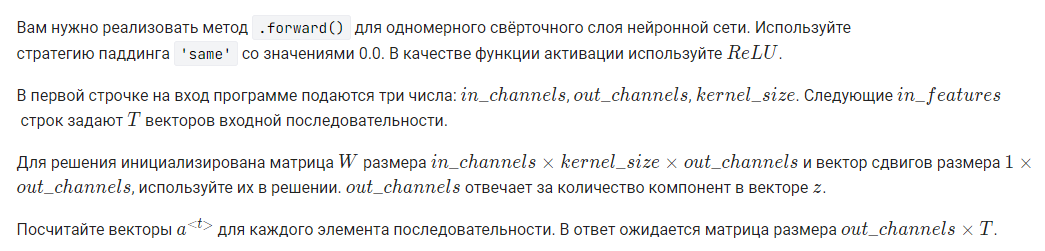

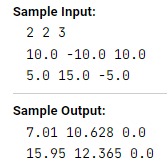

In [ ]:
sample_input_row1 = '2 2 3'
sample_input_rows = ['10.0 -10.0 10.0', '5.0 15.0 -5.0']

In [ ]:
import numpy as np
import torch

In [ ]:
def read_matrix(n_rows, dtype=float):
    print(np.array([list(map(dtype, sample_input_rows[i].split())) for i in range(n_rows)]))
    return np.array([list(map(dtype, sample_input_rows[i].split())) for i in range(n_rows)])   #np.array([list(map(dtype, input().split())) for _ in range(n_rows)])

def print_matrix(matrix):
    for row in matrix:
        print(' '.join(map(str, row)))

In [ ]:
class Conv1d:

    def __init__(self, in_channels, out_channels, kernel_size, padding='same', activation='relu'):
        self.in_channels = in_channels
        self.out_channels = out_channels
        self.kernel_size = kernel_size
        self.padding = padding
        self.activation = activation

        self.W, self.biases = self.init_weight_matrix()

    def init_weight_matrix(self,):
        np.random.seed(1)
        W = np.random.uniform(size=(self.in_channels, self.kernel_size, self.out_channels))
        biases = np.random.uniform(size=(1, self.out_channels))
        return W, biases

    def forward(self, x):
        pass

    def forward1(self, x):
        self.x = x
    
    def slider(self, inp):
        k = self.kernel_size
        h, w = inp.shape
        for h_idx in range(h - (self.kernel_size - 1)):
            for w_idx in range(w - (self.kernel_size - 1)):
                single_slide_area = inp[h_idx:(h_idx + self.kernel_size), w_idx:(w_idx + self.kernel_size)]
                yield single_slide_area, h_idx,w_idx

    def forward(self, x):
            h, w  = x.shape
            p = 0
            
            o = (x.shape[1] - self.kernel_size) + 1

            print('Padding shape: \t', p)
            print('Output shape: \t', o)
            output = torch.zeros((o, o, self.in_channels))

            for single_slide_area, h_idx, w_idx in self.slider(x):
                if h_idx == 0 and w_idx == 0:
                    print('Region shape: \t', list(single_slide_area.shape))
                    print('Kernel shape: \t', list(self.W.shape))
                    print('Single Slide: \t', list(output[h_idx, w_idx].shape))

                output[h_idx, w_idx] = torch.sum(single_slide_area * self.W, axis=(1, 2))

            output = 1. / (1. + torch.exp(-output))

            return output

In [ ]:
def solution():
    in_channels, out_channels, kernel_size = map(int, sample_input_row1.split())  #map(int, input().split())
    input_vectors = read_matrix(in_channels)

    conv = Conv1d(in_channels, out_channels, kernel_size)
    output = conv.forward(input_vectors) #.round(3)
    print_matrix(output)

solution()

[[ 10. -10.  10.]
 [  5.  15.  -5.]]
Padding shape: 	 0
Output shape: 	 1
tensor([0.5000, 0.5000])
